#### Калибровка моделей на данные

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [494]:
df = pd.read_csv("dataset - Лист1.csv")
df

,Unnamed: 0,Unnamed: 1
0,1,"35,83488772"
1,2,"34,31569308"
2,3,"34,73612749"
3,4,"34,98917113"
4,5,"32,16698793"
5,6,"32,76083066"
6,7,"31,86093498"
7,8,"31,85640117"
8,9,"28,23506211"
9,10,"27,0833359"


In [495]:
x= df["Unnamed: 0"]
df["Unnamed: 1"] = df["Unnamed: 1"].apply(lambda x: x.replace(",", "."))
df["Unnamed: 1"]

0     35.83488772
1     34.31569308
2     34.73612749
3     34.98917113
4     32.16698793
5     32.76083066
6     31.86093498
7     31.85640117
8     28.23506211
9      27.0833359
10    26.48606139
11    23.62631449
12    23.88520323
13    21.34163892
14    20.57208069
15    15.25025042
16     14.5468144
17    12.52902806
18    8.860339343
19    4.799946002
Name: Unnamed: 1, dtype: object

In [496]:
y = df["Unnamed: 1"].astype("float64")

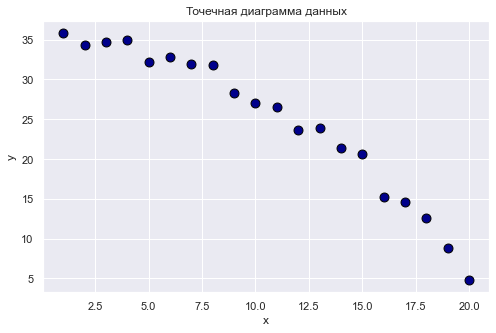

In [497]:
plt.figure(figsize=(8, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Точечная диаграмма данных")
plt.scatter(x, y, label="Data", s=80, facecolor="darkblue", edgecolor="black")

In [498]:
from scipy.optimize import minimize

##### Калибровка экспоненциальной функции

In [499]:
def func(c):

    y1 = c[0] * np.exp(c[1] * x) + c[2]

    return sum((y - y1) ** 2)

res = minimize(func, [-30.,.01, 30], method="L-BFGS-B", bounds=((-30, -3), (0.01, 0.1), (30, 45)))

In [500]:
res

      fun: 15.196852861949665
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.13162822e-06,  1.59872116e-04, -1.24344968e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 152
      nit: 34
     njev: 38
   status: 0
  success: True
        x: array([-5.10755198,  0.09796972, 41.46573638])

In [501]:
y1 = -5.10755198 * np.exp(0.09796972 * x) + 41.46573638

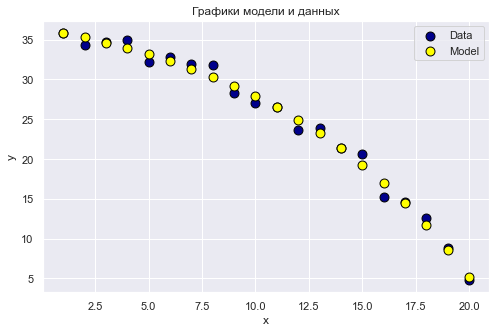

In [502]:
plt.figure(figsize=(8, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графики модели и данных")
plt.scatter(x, y, label="Data", s=80, facecolor="darkblue", edgecolor="black")
plt.scatter(x, y1, label="Model", s=80, facecolor="yellow", edgecolor="black")
plt.legend();

Рассчитаем коэффициент детерминации:

In [503]:
SSE = sum((y - y1) ** 2)
SST = sum((y - y.mean()) ** 2)

In [504]:
r2 = 1 - SSE / SST
r2

0.9909813089143225

##### Калибровка дифференциальной модели

In [505]:
def func(k):

    y2 = k[0] * x + k[1]

    return sum((y - y2) ** 2)

res = minimize(func, [-2, 30], method="L-BFGS-B", bounds=((-2, 0), (30, 45)))
res

      fun: 112.91219553616033
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.26325644e-06, -2.84217071e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-1.53756353, 40.93127253])

In [506]:
y2 = -1.53756353 * x + 40.93127253

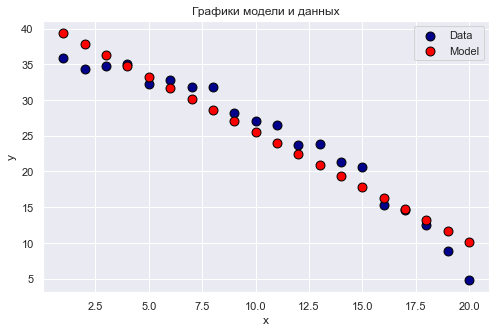

In [507]:
plt.figure(figsize=(8, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графики модели и данных")
plt.scatter(x, y, label="Data", s=80, facecolor="darkblue", edgecolor="black")
plt.scatter(x, y2, label="Model", s=80, facecolor="red", edgecolor="black")
plt.legend();

Рассчитаем коэффициент детерминации:

In [508]:
SSE = sum((y - y2) ** 2)
SST = sum((y - y.mean()) ** 2)

In [509]:
r2 = 1 - SSE / SST
r2

0.9329913752147639

##### Калибровка разностной модели

In [510]:
def func(l):

    y3 = [y[0]]

    for i in range(1, len(x)):

        y3.append(l[0] * y[i - 1] + l[1])

    y3 = np.array(y3)

    return sum((y - y3) ** 2)

res = minimize(func, [-10., -10.], method="L-BFGS-B", bounds=((-10, 10), (-10, 10)))

In [511]:
res

      fun: 42.71389596704499
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.12976296e-04, -5.68434192e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 6
     njev: 17
   status: 0
  success: True
        x: array([ 1.09414378, -4.0659802 ])

In [512]:
y3 = [y[0]]

for i in range(1, len(x)):

    y3.append(1.09414378 * y[i - 1] + -4.0659802)

y3 = np.array(y3)

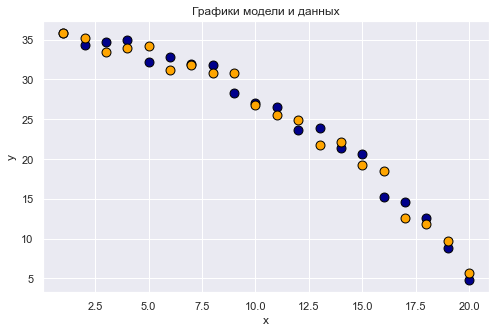

In [513]:
plt.figure(figsize=(8, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графики модели и данных")
plt.scatter(x, y, label="Data", s=80, facecolor="darkblue", edgecolor="black")
plt.scatter(x, y3, label="Model", s=80, facecolor="orange", edgecolor="black");

Рассчитаем коэффициент детерминации:

In [514]:
SSE = sum((y - y3) ** 2)
SST = sum((y - y.mean()) ** 2)

In [515]:
SSE

42.713895967044465

In [516]:
r2 = 1 - SSE / SST
r2

0.9746511046536628